In [30]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
'Current Data Set'
files = [f for f in os.listdir('.') if f.endswith('.csv')]
d = {}
for f in files:
    print(f)
    d[f] = pd.read_csv(f)

2019-04-24 operator_data.csv
2019-04-24 player_data.csv
2019-06-10 operator_data.csv
2019-06-10 player_data.csv


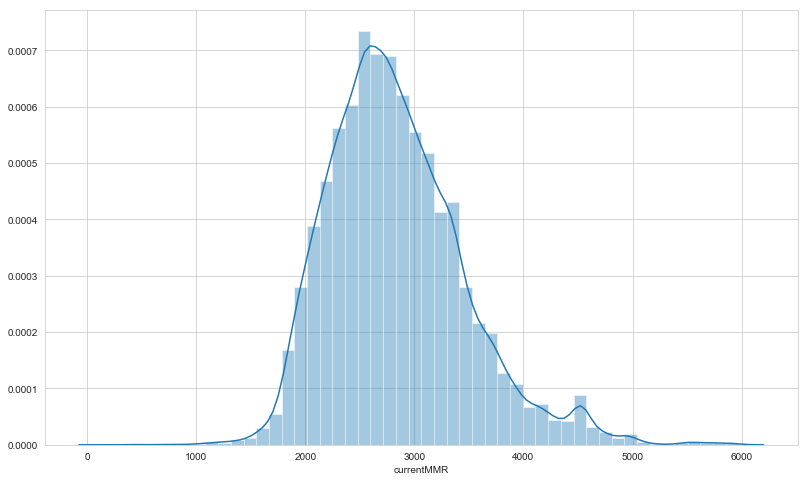

In [32]:
'''
MMR Distribution for first data set
'''
df = d.get('2019-04-24 player_data.csv').copy()
df.drop('Unnamed: 0', inplace=True, axis=1)

mask = (df['currentMMR'] < 6000) & (df['currentMMR'] > 0)
subset = df.loc[mask]

fig, ax = plt.subplots(figsize=(13.5, 8))
sns.distplot(subset['currentMMR'], bins = 50)

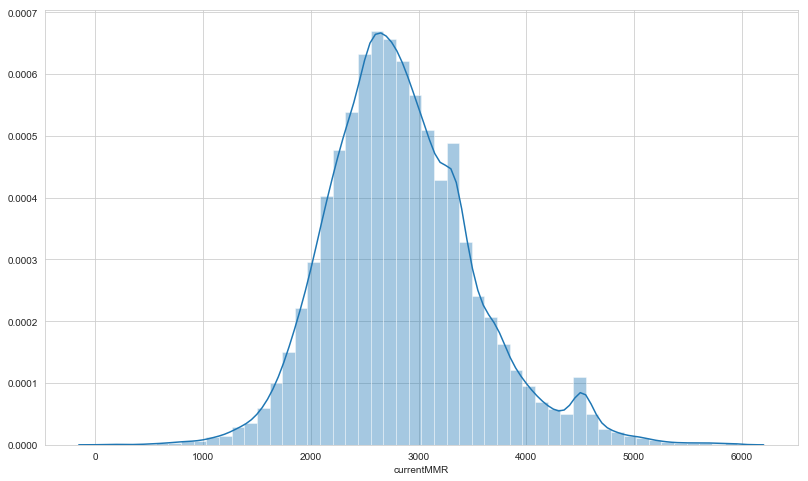

In [33]:
'''
MMR Distribution for second data set
'''
df = d.get('2019-06-10 player_data.csv').copy()
df.drop('Unnamed: 0', inplace=True, axis=1)

mask = (df['currentMMR'] < 6000) & (df['currentMMR'] > 0)
subset = df.loc[mask]

fig, ax = plt.subplots(figsize=(13.5, 8))
sns.distplot(subset['currentMMR'], bins = 50)

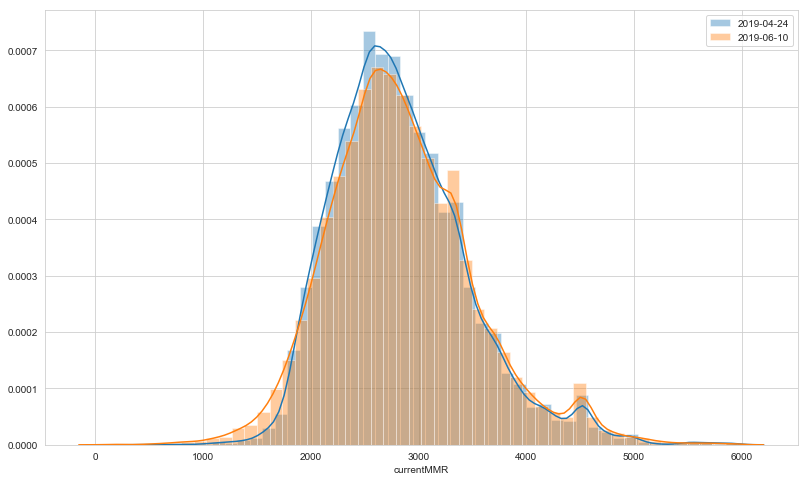

In [37]:
'''
MMR Distribution comparison
'''
df1 = d.get('2019-04-24 player_data.csv').copy()
df2 = d.get('2019-06-10 player_data.csv').copy()
df1.drop('Unnamed: 0', inplace=True, axis=1)
df2.drop('Unnamed: 0', inplace=True, axis=1)

mask1 = (df1['currentMMR'] < 6000) & (df1['currentMMR'] > 0)
subset1 = df1.loc[mask1]

mask2 = (df2['currentMMR'] < 6000) & (df2['currentMMR'] > 0)
subset2 = df2.loc[mask2]

fig, ax = plt.subplots(figsize=(13.5, 8))
sns.distplot(subset1['currentMMR'], bins = 50, label='2019-04-24')
sns.distplot(subset2['currentMMR'], bins = 50, label='2019-06-10')
ax.legend()

In [5]:
'''
Assign Data to DataFrames
'''
op_df_1 = d.get('2019-04-24 operator_data.csv').copy().fillna(0)
op_df_2 = d.get('2019-06-10 operator_data.csv').copy().fillna(0)
pl_df_1 = d.get('2019-04-24 player_data.csv').copy()
pl_df_2 = d.get('2019-06-10 player_data.csv').copy()

'Label Operator Columns'
columns={'Unnamed: 0': 'playerId','1:1': 'SAS Recruit', 
         '1:2': 'FBI Recruit', '1:3': 'GIGN Recruit', 
         '1:4': 'Spetsnaz Recruit','1:5': 'GSG9 Recruit', 
         '2:1': 'Smoke', '2:2': 'Castle', '2:3': 'Doc', 
         '2:4': 'Glaz', '2:5': 'Blitz','2:6': 'Buck', 
         '2:7': 'Blackbeard', '2:8': 'Captiao', '2:9': 
         'Hibana', '2:A': 'Jackal', '2:B': 'Ying','2:C': 
         'Ela', '2:D': 'Dokkaebi', '2:F': 'Maestro', 
         '3:1': 'Mute', '3:2': 'Ash', '3:3': 'Rook', 
         '3:4': 'Fuze','3:5': 'IQ', '3:6': 'Frost', 
         '3:7': 'Valkyrie', '3:8': 'Caveira', '3:9': 
         'Echo', '3:A': 'Mira', '3:B': 'Lesion','3:C': 
         'Zofia', '3:D': 'Vigil', '3:E': 'Lion', '3:F': 
         'Alibi', '4:1': 'Sledge', '4:2': 'Pulse', '4:3': 
         'Twitch','4:4': 'Kapkan', '4:5': 'Jager', '4:E': 
         'Finka', '5:1': 'Thatcher', '5:2': 'Thermite', 
         '5:3': 'Montagne', '5:4': 'Tachanka', '5:5': 'Bandit', 
         '2:11': 'Nomad', '3:11': 'Kaid', '3:10': 'Clash', 
         '2:10': 'Maverick', '3:12': 'Gridlock', '2:12': 'Mozzie'}

'Get rank bands'
ranks = {
    'Diamond': {'min': 4500, 'max': 6000},
    'Platinum 1': {'min': 4100, 'max': 4499},
    'Platinum 2': {'min': 3700, 'max': 4099},
    'Platinum 3': {'min': 3300, 'max': 3699},
    'Gold 1': {'min': 3100, 'max': 3299},
    'Gold 2': {'min': 2900, 'max': 3099},
    'Gold 3': {'min': 2700, 'max': 2899},
    'Gold 4': {'min': 2500, 'max': 2699},
    'Silver 1': {'min': 2400, 'max': 2499},
    'Silver 2': {'min': 2300, 'max': 2399},
    'Silver 3': {'min': 2200, 'max': 2299},
    'Silver 4': {'min': 2100, 'max': 2199},
    'Bronze 1': {'min': 2000, 'max': 2099},
    'Bronze 2': {'min': 1900, 'max': 1999},
    'Bronze 3': {'min': 1800, 'max': 1899},
    'Bronze 4': {'min': 1700, 'max': 1799},
    'Copper 1': {'min': 1600, 'max': 1699},
    'Copper 2': {'min': 1500, 'max': 1599},
    'Copper 3': {'min': 1400, 'max': 1499},
    'Copper 4': {'min': 0, 'max': 1399},
}

'Get rank bands grouped'
groups = {
    'Diamond & Platinum': {'min': 3300, 'max': 6000},
    'Gold & Silver': {'min': 2100, 'max': 3299},
    'Bronze & Copper': {'min': 0, 'max': 2099}
}

'''
Function to format Player DateFrame
'''
def format_pl_df(df):
    df.drop_duplicates('playerId', inplace=True)
    df.set_index('playerId', inplace=True)
    df['Rank'] = 'Unassigned'
    df['Group'] = 'Unassigned'
    for key, rang in ranks.items():
        df['Rank'] = np.where((df['currentMMR'] <= rang.get('max')) 
                              & (df['currentMMR'] >= rang.get('min')), 
                                 key, 
                                 df['Rank'])
        
    for key, rang in groups.items():
        df['Group'] = np.where((df['currentMMR'] <= rang.get('max')) 
                               & (df['currentMMR'] >= rang.get('min')), 
                                 key, 
                                 df['Group'])
        
    df['ranked_matches_played'] = df['rankedWins'] + df['rankedLosses']
    df['casual_matches_played'] = df['casualWins'] + df['casualLosses']
    df['total_matches_played'] = (df['ranked_matches_played'] 
                                  + df['casual_matches_played'])
    
    return df

'''
Apply function
'''
pl_df_1 = format_pl_df(pl_df_1)
pl_df_2 = format_pl_df(pl_df_2)

'''
Retrieve each players MMR, Rank & Rank Group
'''
player_mmr_1 = pl_df_1[['currentMMR', 'Group', 'Rank']]
player_mmr_2 = pl_df_2[['currentMMR', 'Group', 'Rank']]

'''
Get total matches played and then the percentage of those that were ranked
'''
matches = (pl_df_2[['ranked_matches_played', 'total_matches_played']] 
           - pl_df_1[['ranked_matches_played', 'total_matches_played']])
ranked_perc = (matches['ranked_matches_played'] 
               / matches['total_matches_played']).fillna(0).rename('Ranked Perc')

'''
Function to format operator DataFrame
'''
def format_op_df(df):
    df.drop_duplicates(subset = ['Unnamed: 0', 'data'], inplace=True)
    
    df['data'] = np.where(df['data'] == 0, 'Wins', df['data'])
    df['data'] = np.where(df['data'] == '1', 'Losses', df['data'])
    df['data'] = np.where(df['data'] == '2', 'Kills', df['data'])
    df['data'] = np.where(df['data'] == '3', 'Deaths', df['data'])
    df['data'] = np.where(df['data'] == '4', 'TimePlayed', df['data'])
    
    df.rename(columns=columns, inplace=True)
    
    df.set_index('playerId', inplace=True)
    df = df.join(player_mmr_2, how='left', on='playerId')
    df = df.join(ranked_perc, how='left', on='playerId').reset_index()
    df.drop(df[df['Group'] == 'Unassigned'].index, inplace=True)
    df['Group'] = df['Group'].astype('category')
    df['Group'].cat.reorder_categories(['Bronze & Copper', 'Gold & Silver', 'Diamond & Platinum'], ordered=True)    
    df.set_index(['playerId', 'currentMMR', 
                  'Group', 'Rank', 'Ranked Perc'], inplace=True)
    
    return df

'''
Apply formats
'''
op_df_1 = format_op_df(op_df_1)
op_df_2 = format_op_df(op_df_2)

'List operators'
op_columns = ['SAS Recruit', 'FBI Recruit', 'GIGN Recruit', 'Spetsnaz Recruit', 
              'GSG9 Recruit', 'Smoke', 'Castle', 'Doc', 'Glaz', 'Blitz', 'Buck', 
              'Blackbeard', 'Captiao', 'Hibana', 'Jackal', 'Ying', 'Ela', 
              'Dokkaebi', 'Maestro', 'Mute', 'Ash', 'Rook', 'Fuze', 'IQ', 'Frost', 
              'Valkyrie', 'Caveira', 'Echo', 'Mira', 'Lesion', 'Zofia', 'Vigil', 
              'Lion', 'Alibi', 'Sledge', 'Pulse', 'Twitch', 'Kapkan', 'Jager', 
              'Finka', 'Thatcher', 'Thermite',  'Montagne', 'Tachanka', 'Bandit', 
              'Nomad', 'Kaid', 'Clash', 'Maverick', 'Gridlock', 'Mozzie']

'''
Split Operator DataFrames into each data, ( Wins, Losses, Kills & Deaths )
'''
wins_1 = op_df_1.loc[op_df_1['data'] == 'Wins'].copy().drop('data', axis=1)
wins_2 = op_df_2.loc[op_df_2['data'] == 'Wins'].copy().drop('data', axis=1)
losses_1 = op_df_1.loc[op_df_1['data'] == 'Losses'].copy().drop('data', axis=1)
losses_2 = op_df_2.loc[op_df_2['data'] == 'Losses'].copy().drop('data', axis=1)
kills_1 = op_df_1.loc[op_df_1['data'] == 'Kills'].copy().drop('data', axis=1)
kills_2 = op_df_2.loc[op_df_2['data'] == 'Kills'].copy().drop('data', axis=1)
deaths_1 = op_df_1.loc[op_df_1['data'] == 'Deaths'].copy().drop('data', axis=1)
deaths_2 = op_df_2.loc[op_df_2['data'] == 'Deaths'].copy().drop('data', axis=1)

'''
Subtract recent Data from previous to get the season data
'''
wins = wins_2[op_columns].subtract(wins_1[op_columns]).copy()
losses = losses_2[op_columns].subtract(losses_1[op_columns]).copy()
kills = kills_2[op_columns].subtract(kills_1[op_columns]).copy()
deaths = deaths_2[op_columns].subtract(deaths_1[op_columns]).copy()

'''
Create the subset of players with value (Have atleast 
1 game played and more than 80% of games played were ranked)
'''
wins_sub = wins.drop((wins + losses).loc[((wins + losses).sum(axis=1) == 0) 
                                         |(wins.index.get_level_values(4) < 0.8)].index)
losses_sub = losses.drop((wins + losses).loc[((wins + losses).sum(axis=1) == 0) 
                                             | (wins.index.get_level_values(4) < 0.8)].index)
kills_sub = kills.drop((wins + losses).loc[((wins + losses).sum(axis=1) == 0) 
                                           | (wins.index.get_level_values(4) < 0.8)].index)
deaths_sub = deaths.drop((wins + losses).loc[((wins + losses).sum(axis=1) == 0) 
                                             | (wins.index.get_level_values(4) < 0.8)].index)

'Assign Attacker and Defender Ops'
def_ops = ['Smoke', 'Castle', 'Doc', 'Ela', 'Maestro', 'Mute', 
           'Rook', 'Frost', 'Valkyrie', 'Caveira', 'Echo', 'Mira', 
           'Lesion', 'Vigil', 'Alibi', 'Pulse', 'Kapkan', 'Jager', 
           'Tachanka', 'Bandit', 'Kaid', 'Clash', 'Mozzie']

atk_ops = ['Glaz', 'Blitz', 'Buck', 'Blackbeard', 'Captiao', 'Hibana', 
           'Jackal', 'Ying', 'Dokkaebi', 'Ash', 'Fuze', 'IQ', 
           'Zofia', 'Lion', 'Sledge', 'Twitch', 'Finka', 'Thatcher', 
           'Thermite', 'Montagne', 'Nomad', 'Maverick', 'Gridlock']

'''
Split frames into attackers and defenders
'''
wins_atk = wins_sub[atk_ops].copy()
wins_def = wins_sub[def_ops].copy()
losses_atk = losses_sub[atk_ops].copy()
losses_def = losses_sub[def_ops].copy()
kills_atk = kills_sub[atk_ops].copy()
kills_def = kills_sub[def_ops].copy()
deaths_atk = deaths_sub[atk_ops].copy()
deaths_def = deaths_sub[def_ops].copy()

'''
Get data of interest ( Win Percent, KD, Wins, Losses, 
Rounds played, Pick Rates ) and group them by rank groups
'''
win_perc_by_rank = (wins_sub.groupby('Group').sum() 
                    / (wins_sub + losses_sub).groupby('Group').sum()).round(2)
kd_by_rank = (kills_sub.groupby('Group').sum() / deaths_sub.groupby('Group').sum()).round(2)
wins_by_rank = wins_sub.groupby('Group').sum()
losses_by_rank = losses_sub.groupby('Group').sum()
rounds_by_rank = wins_by_rank + losses_by_rank
pick_rates = ((rounds_by_rank[op_columns].div(rounds_by_rank.sum(axis=1), axis=0)))

atk_win_perc_by_rank = (wins_atk.groupby('Group').sum() 
                        / (wins_atk + losses_atk).groupby('Group').sum())
atk_win_delta = atk_win_perc_by_rank.subtract(atk_win_perc_by_rank.mean(axis=1), axis=0)
atk_kd_by_rank = (kills_atk.groupby('Group').sum() 
                  / deaths_atk.groupby('Group').sum()).round(2)
atk_wins_by_rank = wins_atk.groupby('Group').sum()
atk_losses_by_rank = losses_atk.groupby('Group').sum()
atk_rounds_by_rank = atk_wins_by_rank + atk_losses_by_rank
atk_pick_rates = ((atk_rounds_by_rank[atk_ops].div(atk_rounds_by_rank.sum(axis=1), axis=0)))

def_win_perc_by_rank = (wins_def.groupby('Group').sum() 
                        / (wins_def + losses_def).groupby('Group').sum())
def_win_delta = def_win_perc_by_rank.subtract(def_win_perc_by_rank.mean(axis=1), axis=0)
def_kd_by_rank = (kills_def.groupby('Group').sum() 
                  / deaths_def.groupby('Group').sum())
def_wins_by_rank = wins_def.groupby('Group').sum()
def_losses_by_rank = losses_def.groupby('Group').sum()
def_rounds_by_rank = def_wins_by_rank + def_losses_by_rank
def_pick_rates = ((def_rounds_by_rank[def_ops].div(def_rounds_by_rank.sum(axis=1), axis=0)))

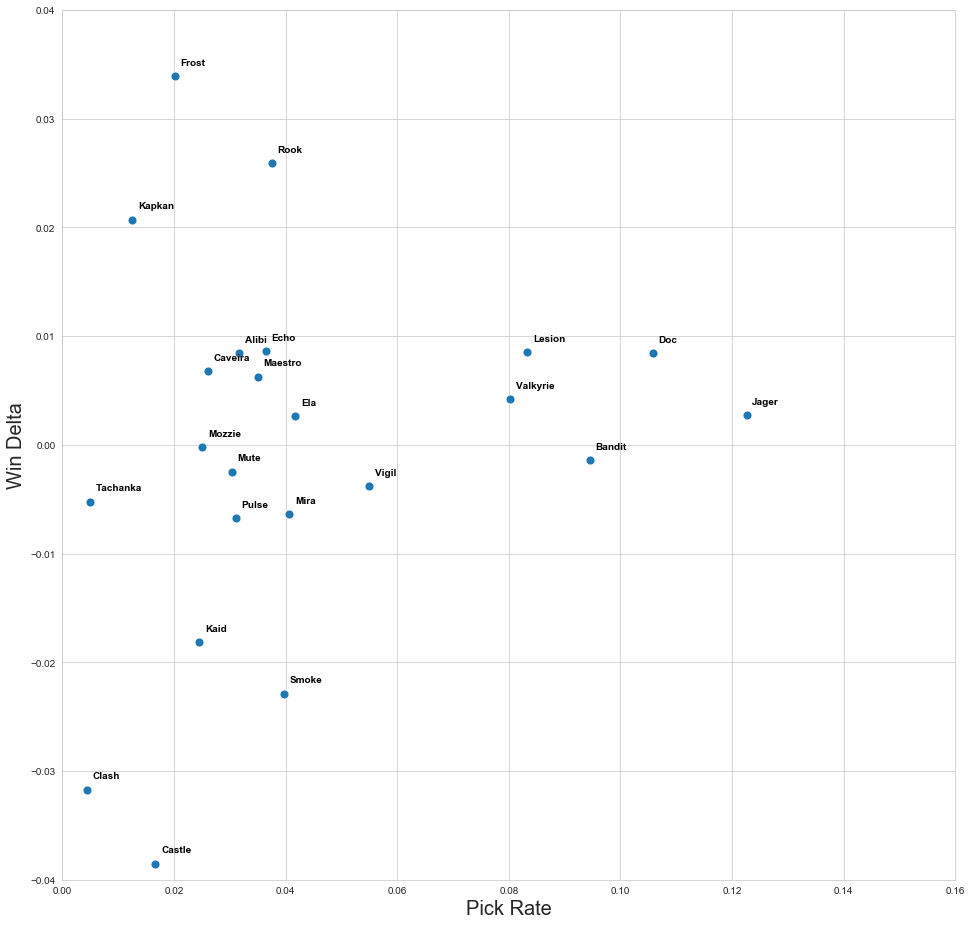

In [6]:
'Defender Pick Rate v Win Delta Plot'

'''
Make data plotable
'''
pick_rates = def_pick_rates.unstack().reset_index().rename(columns = {0: 'pick_rate'})
win_deltas = def_win_delta.unstack().reset_index().rename(columns = {0: 'win_delta'})
df = pd.merge(pick_rates, win_deltas, how='inner', on=['level_0', 'Group'])
df = df.loc[df['Group'] == 'Diamond & Platinum'].reset_index()

'''
Plot win delta against pick rate
'''
sns.set_style("whitegrid", {"xtick.major.size":16, "ytick.major.size":16})
fig, ax = plt.subplots(figsize=(16, 16))
p1 = sns.scatterplot(x='pick_rate', y='win_delta', data=df, s=80)
p1.set_xlabel("Pick Rate",fontsize=20)
p1.set_ylabel("Win Delta",fontsize=20)
ax.set(ylim=(-.04, .04), xlim=(0, 0.16))

for line in range(0, df.shape[0]):
     p1.text(df.pick_rate[line]+0.001, 
             df.win_delta[line]+0.001, 
             df.level_0[line], 
             horizontalalignment='left', 
             size='medium', color='black', weight='semibold')


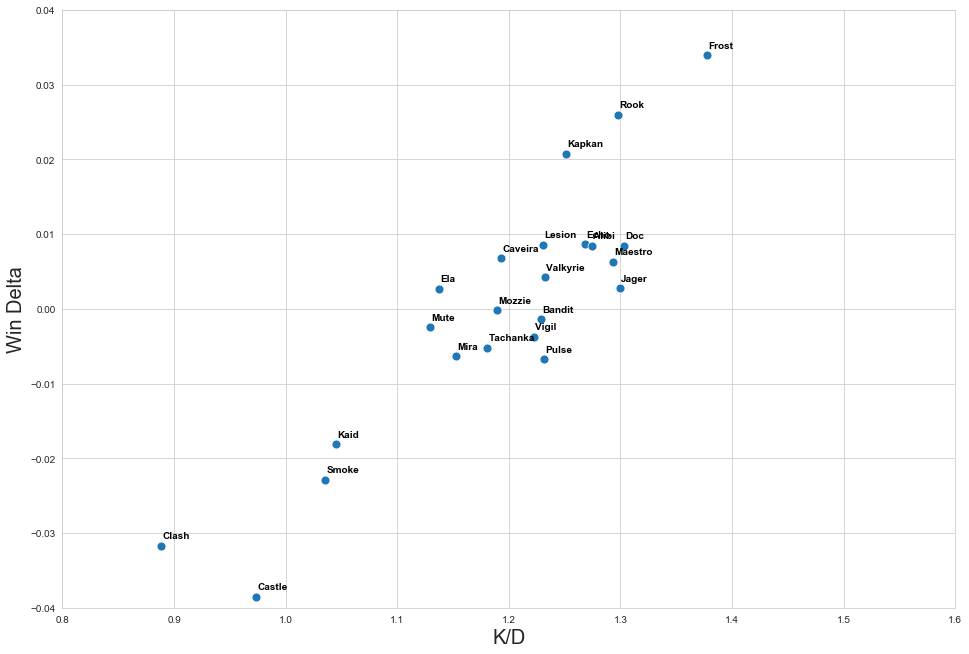

In [7]:
'Defender KD v Win Delta Plot'

'''
Make data plotable
'''
pick_rates = def_kd_by_rank.unstack().reset_index().rename(columns = {0: 'kd'})
win_deltas = def_win_delta.unstack().reset_index().rename(columns = {0: 'win_delta'})
df = pd.merge(pick_rates, win_deltas, how='inner', on=['level_0', 'Group'])
df = df.loc[df['Group'] == 'Diamond & Platinum'].reset_index()

'''
Plot win delta against pick rate
'''
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 11))
p1 = sns.scatterplot(x='kd', y='win_delta', data=df, s=80)
p1.set_xlabel("K/D",fontsize=20)
p1.set_ylabel("Win Delta",fontsize=20)
ax.set(ylim=(-.04, .04), xlim=(0.8, 1.6))

for line in range(0, df.shape[0]):
     p1.text(df.kd[line]+0.001, 
             df.win_delta[line]+0.001, 
             df.level_0[line], 
             horizontalalignment='left', 
             size='medium', color='black', weight='semibold')


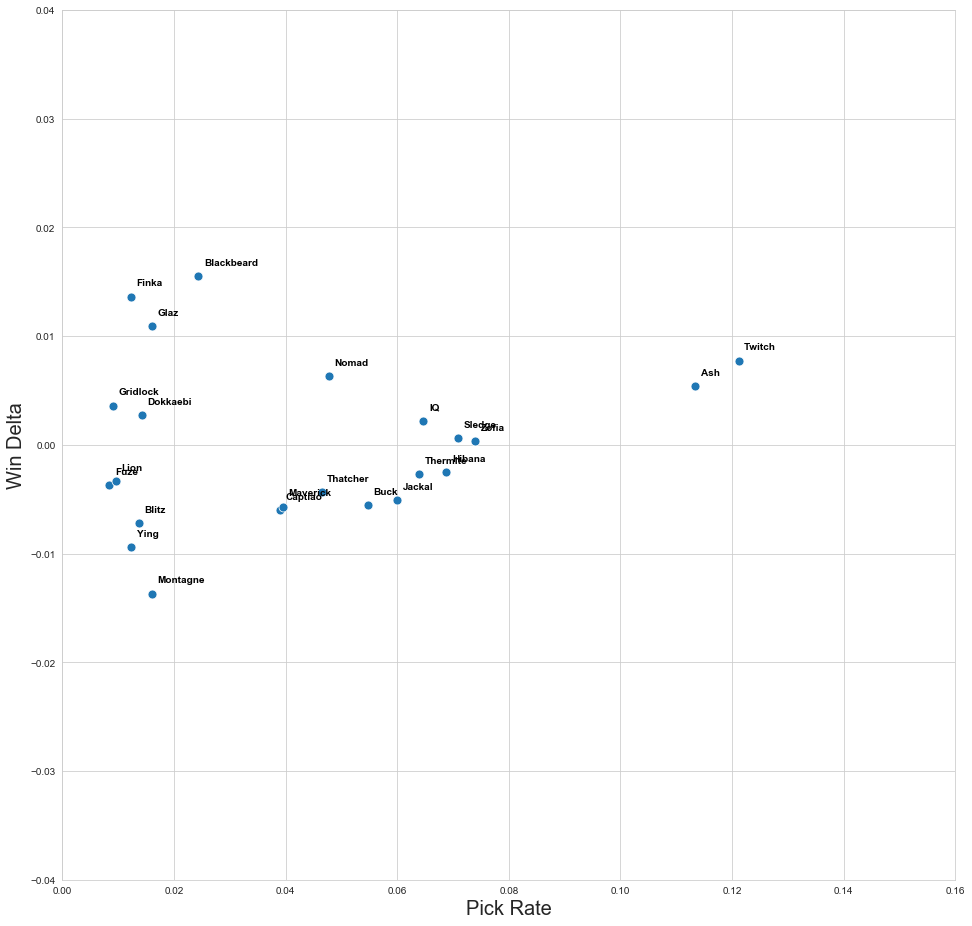

In [14]:
'Attacker Pick Rate v Win Delta Plot'

'''
Make data plotable
'''
pick_rates = atk_pick_rates.unstack().reset_index().rename(
                                                    columns = {0: 'pick_rate'}
                                                )
win_deltas = atk_win_delta.unstack().reset_index().rename(
                                                    columns = {0: 'win_delta'}
                                                )
df = pd.merge(pick_rates, win_deltas, how='inner', on=['level_0', 'Group'])
df = df.loc[df['Group'] == 'Diamond & Platinum'].reset_index()

'''
Plot win delta against pick rates
'''
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 16))
p1 = sns.scatterplot(x='pick_rate', y='win_delta', data=df, s=80)
p1.set_xlabel("Pick Rate",fontsize=20)
p1.set_ylabel("Win Delta",fontsize=20)
ax.set(ylim=(-.04, .04), xlim=(0, 0.16))

for line in range(0, df.shape[0]):
     p1.text(df.pick_rate[line]+0.001, 
             df.win_delta[line]+0.001, 
             df.level_0[line], 
             horizontalalignment='left', 
             size='medium', color='black', weight='semibold')


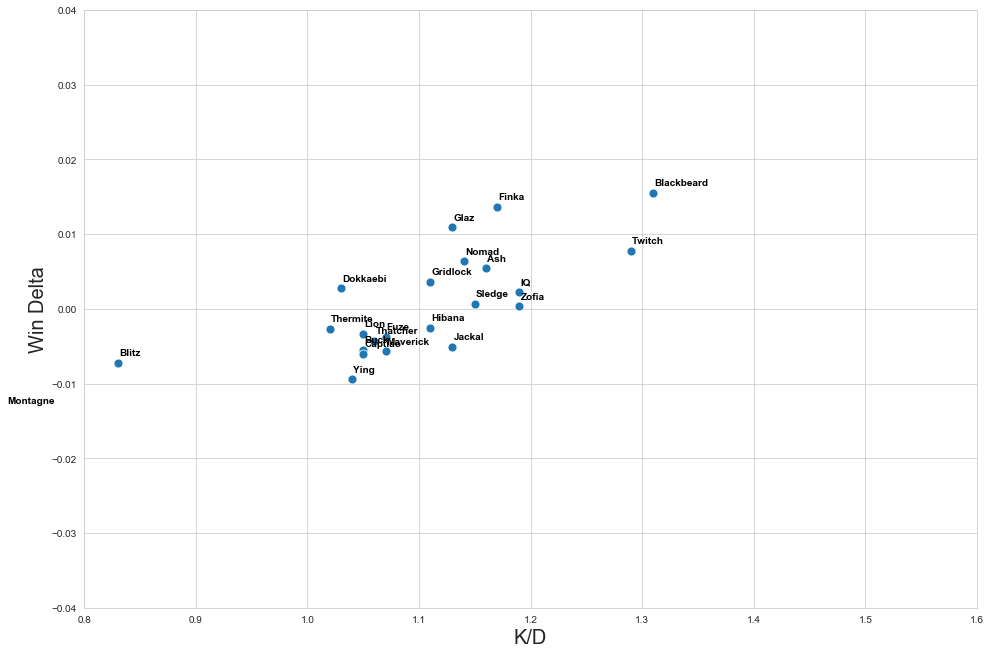

In [9]:
'Attacker KD v Win Delta Plot'

'''
Make data plotable
'''
kd = atk_kd_by_rank.unstack().reset_index().rename(
                                                    columns = {0: 'kd'}
                                                )
win_deltas = atk_win_delta.unstack().reset_index().rename(
                                                    columns = {0: 'win_delta'}
                                                )
df = pd.merge(kd, win_deltas, how='inner', on=['level_0', 'Group'])
df = df.loc[df['Group'] == 'Diamond & Platinum'].reset_index()

'''
Plot win delta against pick rates
'''
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 11))
p1 = sns.scatterplot(x='kd', y='win_delta', data=df, s=80)
p1.set_xlabel("K/D",fontsize=20)
p1.set_ylabel("Win Delta",fontsize=20)
ax.set(ylim=(-.04, .04), xlim=(0.8, 1.6))

for line in range(0, df.shape[0]):
     p1.text(df.kd[line]+0.001, 
             df.win_delta[line]+0.001, 
             df.level_0[line], 
             horizontalalignment='left', 
             size='medium', color='black', weight='semibold')


In [10]:
(def_win_delta.T.sort_index() * 100).round(2)[['Diamond & Platinum', 'Gold & Silver',
                                               'Bronze & Copper']]

Group,Diamond & Platinum,Gold & Silver,Bronze & Copper
Alibi,0.85,0.39,0.25
Bandit,-0.14,-0.54,-0.21
Castle,-3.85,-3.08,-2.29
Caveira,0.68,0.71,0.26
Clash,-3.17,-1.36,0.17
Doc,0.85,0.78,0.57
Echo,0.86,0.92,1.41
Ela,0.27,0.32,0.27
Frost,3.39,4.06,3.06
Jager,0.27,0.42,0.34


In [11]:
(atk_win_delta.T.sort_index() * 100).round(2)[['Diamond & Platinum', 'Gold & Silver',
                                               'Bronze & Copper']]

Group,Diamond & Platinum,Gold & Silver,Bronze & Copper
Ash,0.54,0.38,0.61
Blackbeard,1.56,0.55,0.34
Blitz,-0.72,-0.39,-0.22
Buck,-0.55,-0.75,-0.48
Captiao,-0.60,-0.73,-1.69
Dokkaebi,0.27,-0.49,-0.23
Finka,1.36,1.26,1.38
Fuze,-0.37,-0.13,-0.43
Glaz,1.09,0.56,-0.35
Gridlock,0.36,0.69,0.01
